# Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r'C:\Users\GD077686\OneDrive - Cerner Corporation\Desktop\datatrained\New folder\Automobile_insurance_fraud.csv')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df.shape

(1000, 40)

In [7]:
df.drop(['_c39'],axis=1,inplace=True)

- All the values in the _c39 are Nan, hence removing this columns

In [8]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

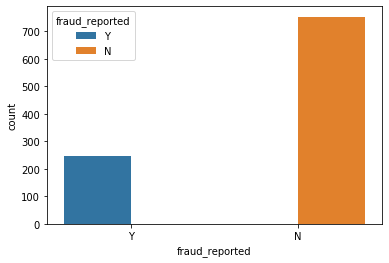

In [9]:
sns.countplot(x='fraud_reported',data=df, hue='fraud_reported')

In [10]:
df.shape[0]

1000

In [11]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

In [12]:
missing_stats = []

for col in df.columns:
    missing_stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(missing_stats, columns=['feature', 'unique_values', 'percent_missing', 'percent_biggest_cat', 'type'])
stats_df.sort_values('percent_missing', ascending=False)

feature  unique_values  percent_missing  \
0            months_as_customer            391              0.0   
29                    witnesses              4              0.0   
22               incident_state              7              0.0   
23                incident_city              7              0.0   
24            incident_location           1000              0.0   
25     incident_hour_of_the_day             24              0.0   
26  number_of_vehicles_involved              4              0.0   
27              property_damage              3              0.0   
28              bodily_injuries              3              0.0   
30      police_report_available              3              0.0   
20            incident_severity              4              0.0   
31           total_claim_amount            763              0.0   
32                 injury_claim            638              0.0   
33               property_claim            626              0.0   
34                vehicle_claim            726              0.0   
35                    auto_make             14              0.0   
36                   auto_model             39              0.0   
37                    auto_year             21              0.0   
21        authorities_contacted              5              0.0   
19               collision_type              4              0.0   
1                           age             46              0.0   
9                   insured_zip            995              0.0   
2                 policy_number           1000              0.0   
3              policy_bind_date            951              0.0   
4                  policy_state              3              0.0   
5                    policy_csl              3              0.0   
6             policy_deductable              3              0.0   
7         policy_annual_premium            991              0.0   
8                umbrella_limit             11              0.0   
10                  insured_sex              2              0.0   
18                incident_type              4              0.0   
11      insured_education_level              7              0.0   
12           insured_occupation             14              0.0   
13              insured_hobbies             20              0.0   
14         insured_relationship              6              0.0   
15                capital-gains            338              0.0   
16                 capital-loss            354              0.0   
17                incident_date             60              0.0   
38               fraud_reported              2              0.0   

    percent_biggest_cat     type  
0                   0.8    int64  
29                 25.8    int64  
22                 26.2   object  
23                 15.7   object  
24                  0.1   object  
25                  5.4    int64  
26                 58.1    int64  
27                 36.0   object  
28                 34.0    int64  
30                 34.3   object  
20                 35.4   object  
31                  0.5    int64  
32                  2.5    int64  
33                  1.9    int64  
34                  0.7    int64  
35                  8.0   object  
36                  4.3   object  
37                  5.6    int64  
21                 29.2   object  
19                 29.2   object  
1                   4.9    int64  
9                   0.2    int64  
2                   0.1    int64  
3                   0.3   object  
4                  35.2   object  
5                  35.1   object  
6                  35.1    int64  
7                   0.2  float64  
8                  79.8    int64  
10                 53.7   object  
18                 41.9   object  
11                 16.1   object  
12                  9.3   object  
13                  6.4   object  
14                 18.3   object  
15                 50.8    int64  
16                 47.5    int64  
17           

In [13]:
pd.set_option("display.max_columns",None,"display.max_rows",None)

In [14]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [15]:
#extract out the year as 

df['policy_bind_year']=df['policy_bind_date'].str.split('-').str[2]

In [16]:
df['policy_bind_year'].astype('int64')

0      2014
1      2006
2      2000
3      1990
4      2014
5      2006
6      2000
7      1990
8      1997
9      2011
10     2002
11     1999
12     1997
13     2012
14     1998
15     1992
16     2005
17     2004
18     2014
19     1992
20     2002
21     2005
22     1994
23     1991
24     1996
25     2013
26     1990
27     2002
28     1990
29     2014
30     2000
31     2008
32     2003
33     1992
34     1991
35     2010
36     2003
37     1993
38     2002
39     1997
40     1995
41     2012
42     2006
43     2003
44     2007
45     2006
46     1990
47     1990
48     2008
49     1997
50     2004
51     1994
52     2002
53     1994
54     2014
55     2007
56     2008
57     1995
58     1993
59     2005
60     1990
61     1993
62     2014
63     2008
64     2007
65     1993
66     2011
67     1990
68     1994
69     1994
70     2011
71     1998
72     1995
73     2002
74     2004
75     2001
76     2010
77     1992
78     2010
79     2013
80     1994
81     1997
82     2011
83  

In [ ]:
df.head()

In [18]:
#extract the month out 
#all accidents are from 2015 jan and feb, so year isnt very important

df['incident_month']=df['incident_date'].str.split('-').str[1].astype('int64')

In [19]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
5                   256   39         104594       12-10-2006           OH   
6                   137   34         413978       04-06-2000           IN   
7                   165   37         429027       03-02-1990           IL   
8                    27   33         485665       05-02-1997           IL   
9                   212   42         636550       25-07-2011           IL   
10                  235   42         543610       26-05-2002           OH   
11                  447   61         214618       29-05-1999           OH   
12                   60   23         842643       20-11-1997           OH   
13                  121   34         626808       26-10-2012           OH   
14                  180   38         644081       28-12-1998           OH   
15                  473   58         892874       19-10-1992           IN   
16                   70   26         558938       08-06-2005           OH   
17                  140   31         275265       15-11-2004           IN   
18                  160   37         921202       28-12-2014           OH   
19                  196   39         143972       02-08-1992           IN   
20                  460   62         183430       25-06-2002           IN   
21                  217   41         431876       27-11-2005           IL   
22                  370   55         285496       27-05-1994           IL   
23                  413   55         115399       08-02-1991           IN   
24                  237   40         736882       02-02-1996           IN   
25                    8   35         699044       05-12-2013           OH   
26                  257   43         863236       20-09-1990           IN   
27                  202   34         608513       18-07-2002           IN   
28                  224   40         914088       08-02-1990           OH   
29                  241   45         596785       04-03-2014           IL   
30                   64   25         908616       18-02-2000           IL   
31                  166   37         666333       19-06-2008           IL   
32                  155   35         336614       01-08-2003           IL   
33                  114   30         584859       04-04-1992           IL   
34                  149   37         990493       13-01-1991           IL   
35                  147   33         129872       08-08-2010           OH   
36                   62   28         200152       09-03-2003           IL   
37                  289   49         933293       03-02-1993           IL   
38                  431   54         485664       25-11-2002           IN   
39                  199   37         982871       27-07-1997           IN   
40                   79   26         206213       08-05-1995           IL   
41                  116   34         616337       30-08-2012           IN   
42                   37   23         448961       30-04-2006           IL   
43                  106   30         790442       13-04-2003           OH   
44                  269   44         108844       05-12-2007           IL   
45                  265   40         430029       21-08-2006           IL   
46                  163   33         529112       08-01-1990           IN   
47                  355   47         939631       18-03-1990           OH   
48                  175   34         866931       07-01-2008           IN   
49                  192   35         582011       10-03-1997           IL   
50                  430   59         691189       10-01-2004           OH   
5

In [20]:
#replace "?" with undocumented 

df['collision_type']=df['collision_type'].replace('?','undocumented')
df['property_damage']=df['property_damage'].replace('?','undocumented')
df['police_report_available']=df['police_report_available'].replace('?','undocumented')
df['auto_model']=df['auto_model'].replace("Suburu", "Subaru")


In [21]:
df.incident_severity.unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [22]:
df['incident_severity']=df['incident_severity'].map({'Major Damage':2,'Minor Damage':1,'Total Loss':4,'Trivial Damage':0}).astype('int64')
df.incident_severity.value_counts()

1    354
4    280
2    276
0     90
Name: incident_severity, dtype: int64

In [ ]:
df.head()

In [23]:
#umbrella limit is like an insruance topup that pays your liabilities in case you get sued
#cannot be zero
#this 0 is an error

df['umbrella_limit'].sort_values(ascending=True)

290    -1000000
0             0
623           0
624           0
625           0
627           0
628           0
629           0
630           0
632           0
633           0
634           0
635           0
636           0
637           0
638           0
640           0
641           0
642           0
643           0
645           0
646           0
647           0
648           0
649           0
622           0
650           0
621           0
618           0
589           0
590           0
591           0
592           0
593           0
594           0
595           0
596           0
600           0
601           0
602           0
620           0
604           0
606           0
608           0
609           0
610           0
611           0
612           0
613           0
614           0
615           0
616           0
617           0
605           0
588           0
651           0
655           0
698           0
699           0
701           0
702           0
703           0
704     

In [25]:
df['umbrella_limit'].iloc[290]= 1000000

In [27]:
#check
df['umbrella_limit'].iloc[290]

1000000

# Identify by data types

In [28]:
all_var = list(df.columns)
len(all_var)

41

In [29]:
#continuous variables = ordinal, interval, ratio

cont_var =['age','incident_hour_of_the_day',
           'number_of_vehicles_involved','total_claim_amount',
           'injury_claim','property_claim','vehicle_claim',
           'months_as_customer','policy_annual_premium','policy_deductable',
           'umbrella_limit','capital-gains','capital-loss', 
           'auto_year','witnesses','bodily_injuries','policy_bind_year','incident_severity']

len(cont_var)

18

In [30]:

#ordinal var

ord_var = ['policy_deductable','witnesses','bodily_injuries','incident_severity']
len(ord_var)

4

In [31]:

ord_var

['policy_deductable', 'witnesses', 'bodily_injuries', 'incident_severity']

In [32]:
#quan var = interval or ratio 

quan_var = (list(set(cont_var) - set(ord_var))) 
len(quan_var)

14

In [33]:
#norminal aka discrete var

nom_var = (list(set(all_var) - set(cont_var))) 
len(nom_var)

23

In [34]:
#check for norminal data with vevry large number of categories

for col in nom_var:
    print("###", col, "###" )
    print("  ")
    print(df[col].value_counts())
    print("---------------------------------------------")
    print("  ")

### policy_state ###
  
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
---------------------------------------------
  
### authorities_contacted ###
  
Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64
---------------------------------------------
  
### incident_type ###
  
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
---------------------------------------------
  
### property_damage ###
  
undocumented    360
NO              338
YES             302
Name: property_damage, dtype: int64
---------------------------------------------
  
### policy_csl ###
  
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
---------------------------------------------
  
### incident_location ###
  
7954 Tree Ridge            1
1123 5th Lane              1
4693 Linco

In [35]:
#check for norminal data with vevry large number of categories

for col in nom_var:
    print("###", col, "###" )
    print("  ")
    print(df[col].value_counts())
    print("---------------------------------------------")
    print("  ")

### policy_state ###
  
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
---------------------------------------------
  
### authorities_contacted ###
  
Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64
---------------------------------------------
  
### incident_type ###
  
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
---------------------------------------------
  
### property_damage ###
  
undocumented    360
NO              338
YES             302
Name: property_damage, dtype: int64
---------------------------------------------
  
### policy_csl ###
  
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
---------------------------------------------
  
### incident_location ###
  
7954 Tree Ridge            1
1123 5th Lane              1
4693 Linco

In [37]:
#for those that have not too many unique, we can plot them out

large_cat = []

for col in nom_var:
    if df[col].nunique() > 20:
        large_cat.append(col)
        print(col, df[col].nunique())
    else: 
        pass
    
#incident location, insured zip, policy bind date, policy number too many unique to be meaningful

incident_location 1000
policy_bind_date 951
incident_date 60
insured_zip 995
auto_model 39
policy_number 1000


In [38]:
#get a data frame with var that have large num categories
#only auto model 
large_dummy = pd.get_dummies(df[['auto_model','incident_date']], drop_first=True)

#put in the DV
large_dummy['fraud_reported']=df['fraud_reported']

#numerical code the DV
large_dummy['fraud_reported'] = large_dummy['fraud_reported'].map({"Y":1,"N":0})

#unique to each case. wont be useful
large_dummy.head(10)

auto_model_92x  auto_model_93  auto_model_95  auto_model_A3  auto_model_A5  \
0               1              0              0              0              0   
1               0              0              0              0              0   
2               0              0              0              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   
5               0              0              1              0              0   
6               0              0              0              0              0   
7               0              0              0              0              1   
8               0              0              0              0              0   
9               1              0              0              0              0   

   auto_model_Accord  auto_model_C300  auto_model_CRV  auto_model_Camry  \
0                  0                0               0                 0   
1                  0                0               0                 0   
2                  0                0               0                 0   
3                  0                0               0                 0   
4                  0                0               0                 0   
5                  0                0               0                 0   
6                  0                0               0                 0   
7                  0                0               0                 0   
8                  0                0               0                 1   
9                  0                0               0                 0   

   auto_model_Civic  auto_model_Corolla  auto_model_E400  auto_model_Escape  \
0                 0                   0                0                  0   
1                 0                   0                1                  0   
2                 0                   0                0                  0   
3                 0                   0                0                  0   
4                 0                   0                0                  0   
5                 0                   0                0                  0   
6                 0                   0                0                  0   
7                 0                   0                0                  0   
8                 0                   0                0                  0   
9                 0                   0                0                  0   

   auto_model_F150  auto_model_Forrestor  auto_model_Fusion  \
0                0                     0                  0   
1                0                     0                  0   
2                0                     0                  0   
3                0                     0                  0   
4                0                     0                  0   
5                0                     0                  0   
6                0                     0                  0   
7                0                     0                  0   
8                0                     0                  0   
9                0                     0                  0   

   auto_model_Grand Cherokee  auto_model_Highlander  auto_model_Impreza  \
0                          0                      0                   0   
1                          0                      0                   0   
2                          0                      0                   0   
3                          0                      0                   0   
4                          0                      0                   0   
5                          0                      0                   0   
6                          0                      0                   0   
7                          0                      0                   0   
8                          0                  

In [39]:
#Color negative numbers red, positive blue
def color(val):
    color = 'green' if val ==1 else 'red' if val < -0.3 else 'blue' if val > 0.3 else 'black'   #write like lambda
    return 'color: %s' % color


corr = large_dummy.corr()
corr.style.applymap(color)


#no correlation with make and fraud. drop var

In [40]:
#drop this variables from analysis 

df.drop(large_cat, axis=1, inplace=True)

In [42]:
#redefine the norminal var
#remove dv from the list

nom_var.remove('fraud_reported')
nom_var = (list(set(nom_var) - set(large_cat))) 
len(nom_var)

16

In [43]:

#check columns add up 

print ('total var count:{}'.format(len(list(df.columns))),
       'continous var count:{}'.format(len(cont_var)),
       'norminal var count:{}'.format(len(nom_var)))

total var count:35 continous var count:18 norminal var count:16


# Exploratory Data Analysis
- Dependent variable
- Exploratory data analysis was conducted started with the dependent variable, Fraud_reported. There were 247 frauds and 753 non-frauds. 24.7% of the data were frauds while 75.3% were non-fraudulent claims.

In [45]:

#count each level of the Dv

df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [46]:
#proportion of each level of DV

df.fraud_reported.value_counts(normalize=True)

N    0.753
Y    0.247
Name: fraud_reported, dtype: float64

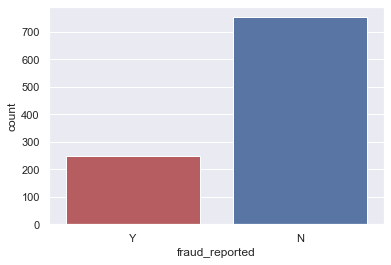

In [47]:
#dist of dv
#plt.style.use('dark_background') for ppt 
sns.set()

sns.countplot(x ="fraud_reported", data=df, palette=['r','b']);

In [ ]:
corr = df[cont_var].corr()

In [ ]:
corr = df[cont_var].corr()

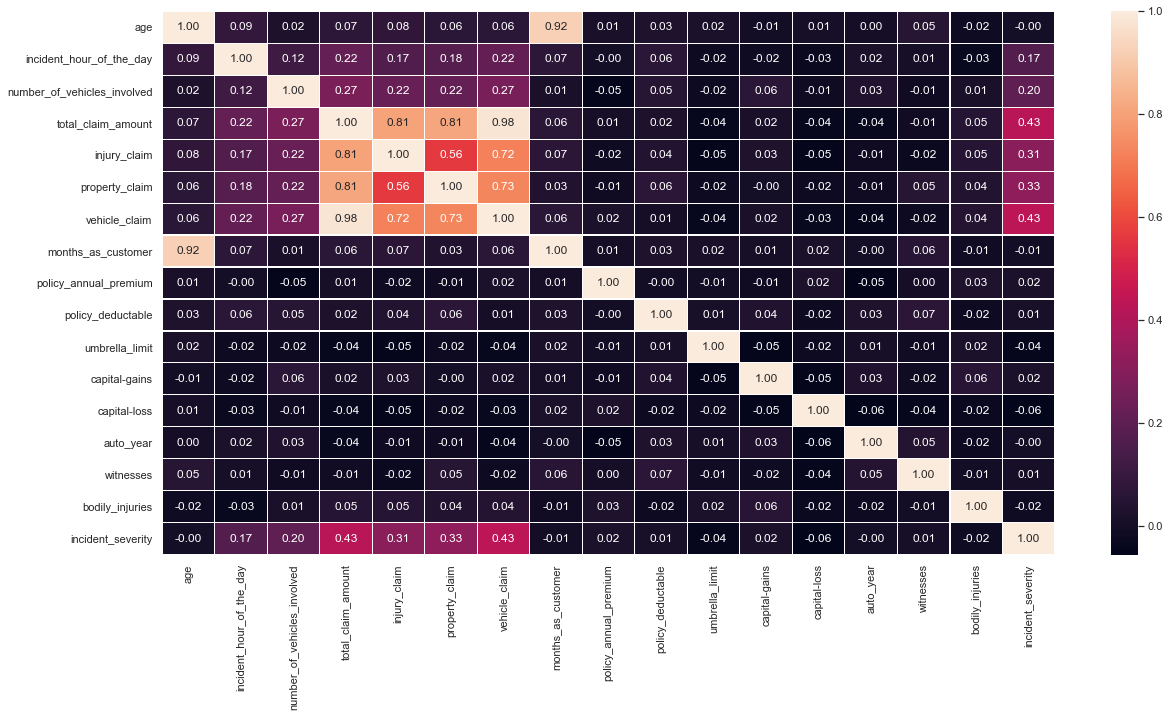

In [49]:
corr = df[cont_var].corr()
plt.figure(figsize=(20,10))
ax=sns.heatmap(corr, annot=True,fmt='.2f',linecolor='white',linewidths=0.1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Visualization

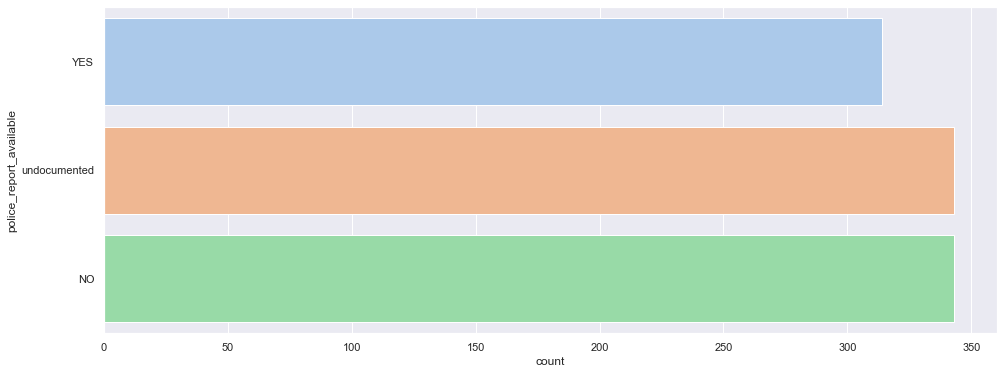

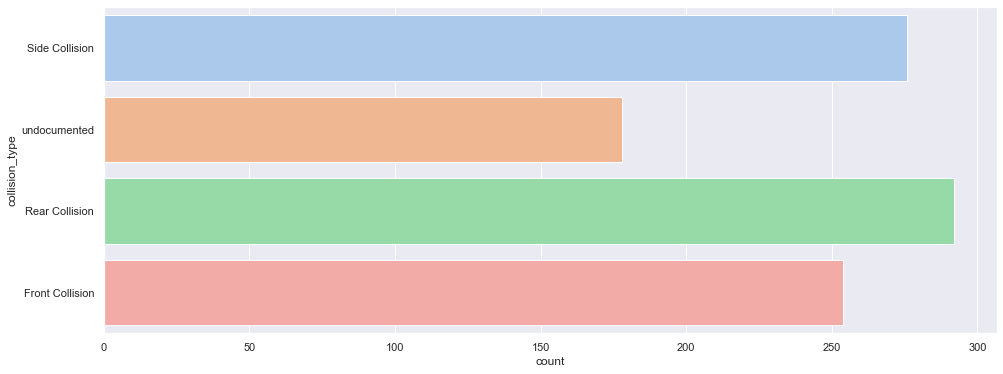

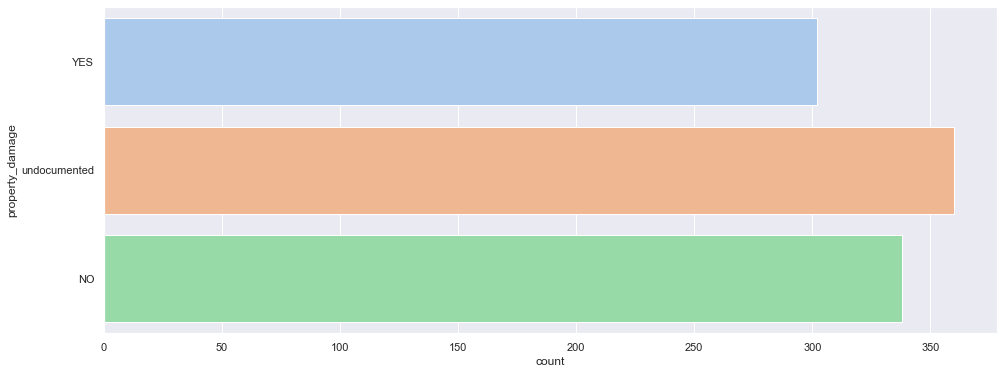

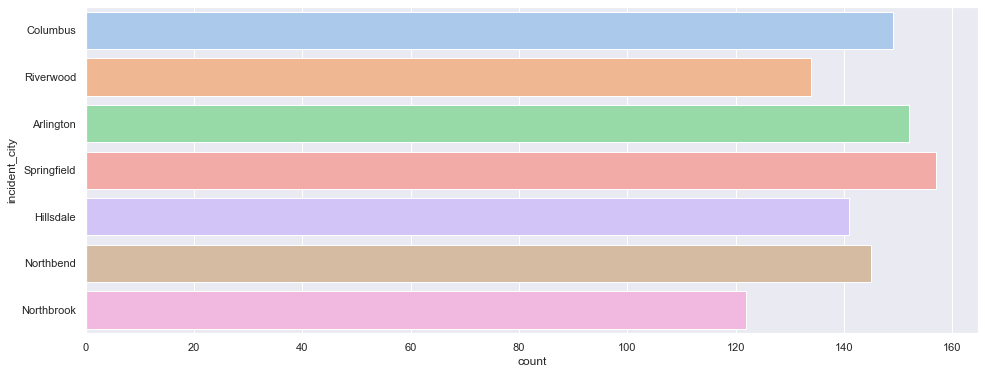

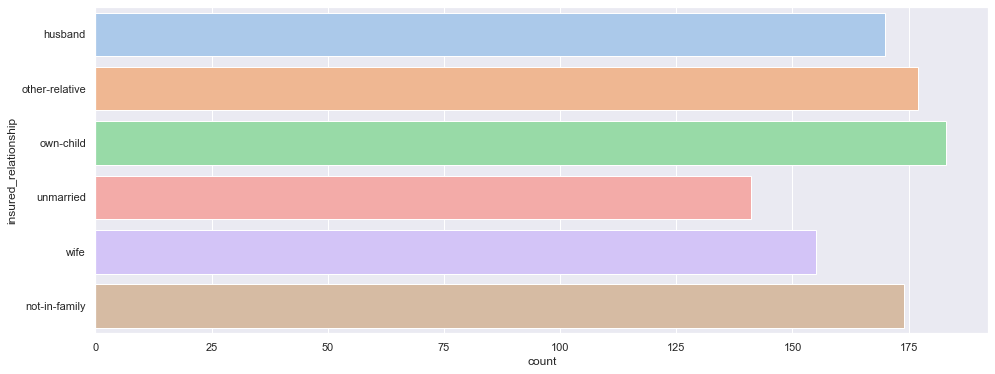

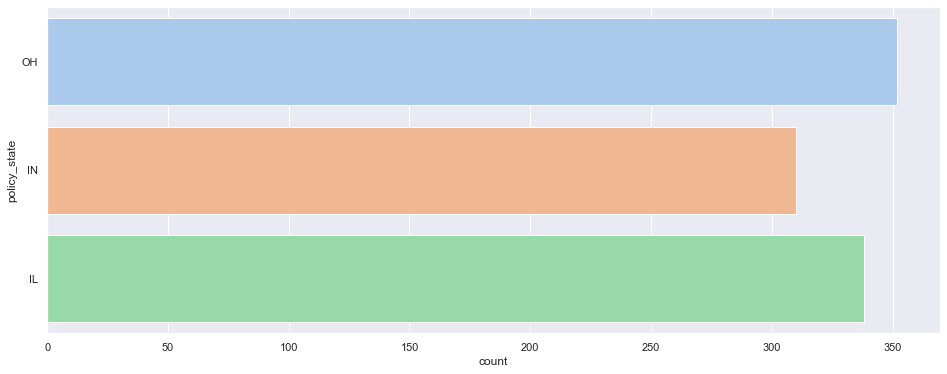

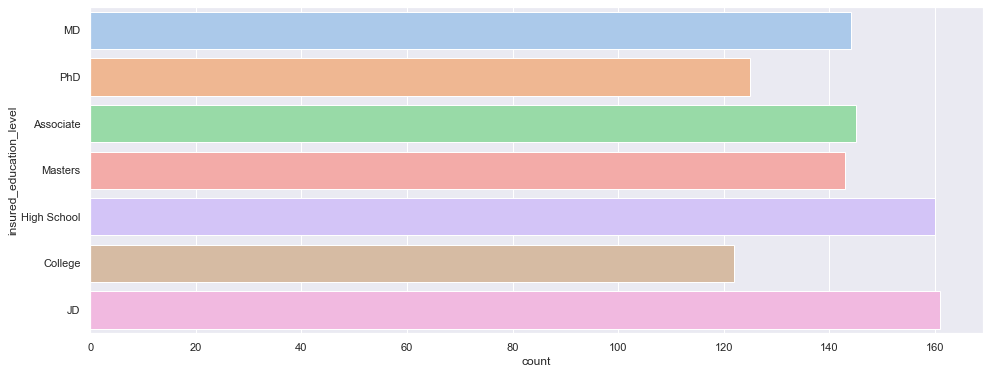

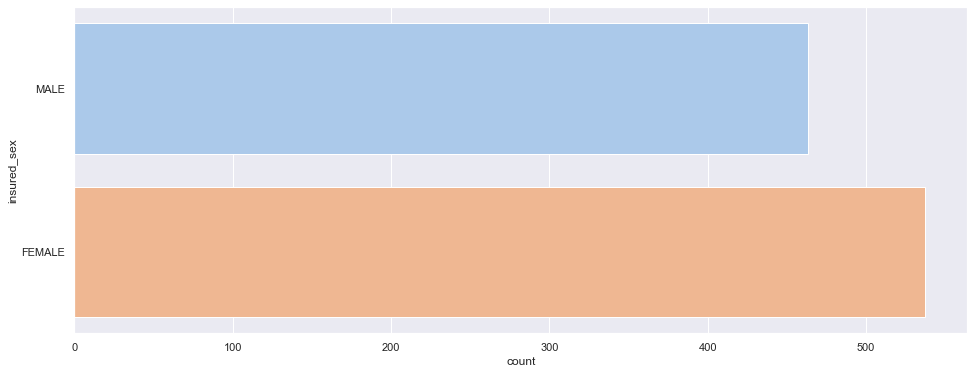

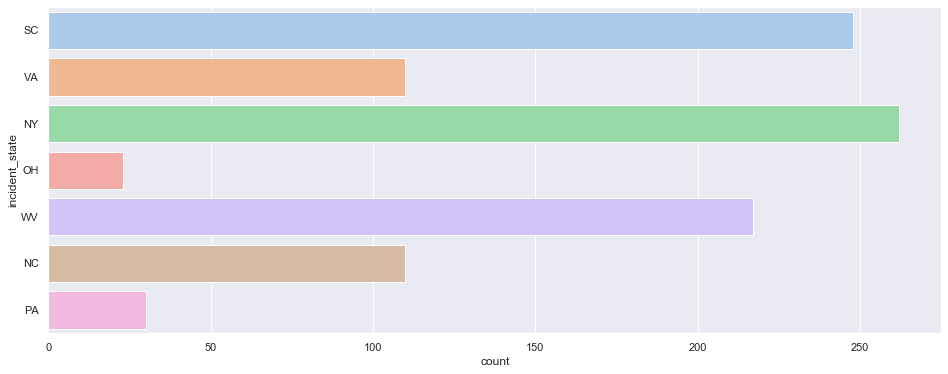

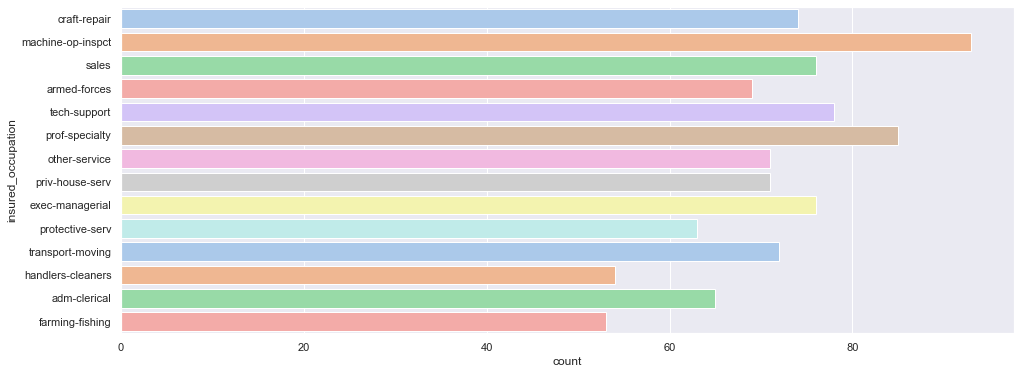

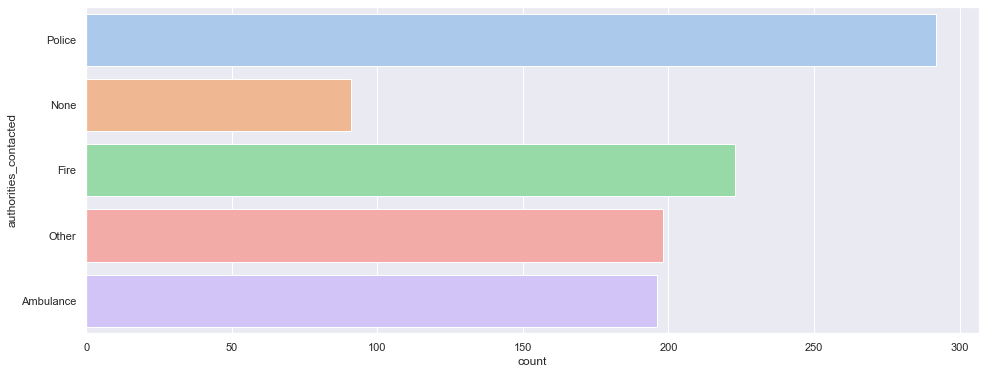

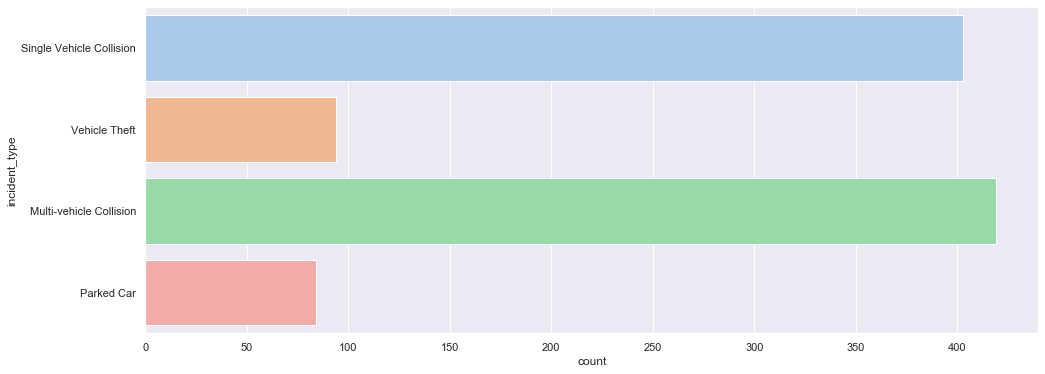

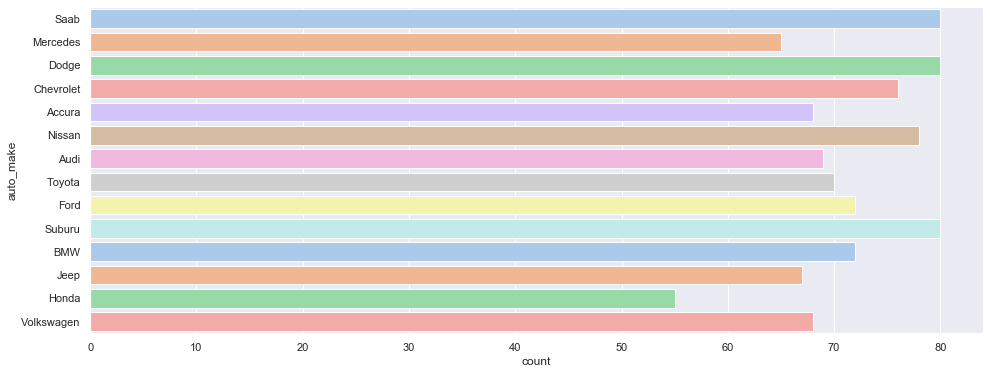

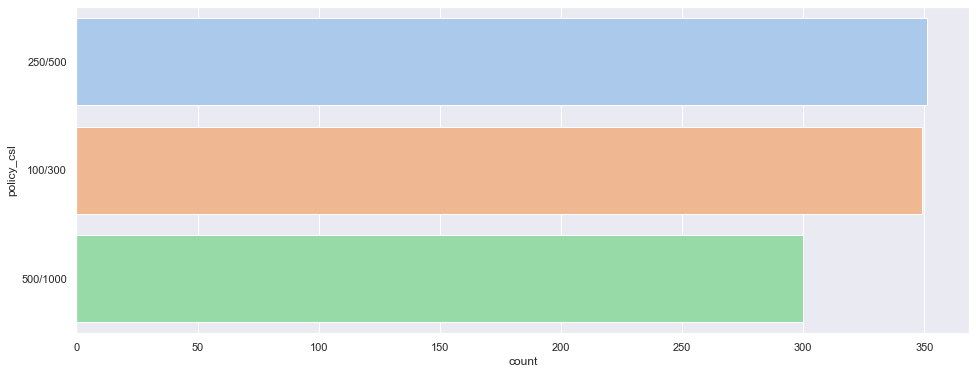

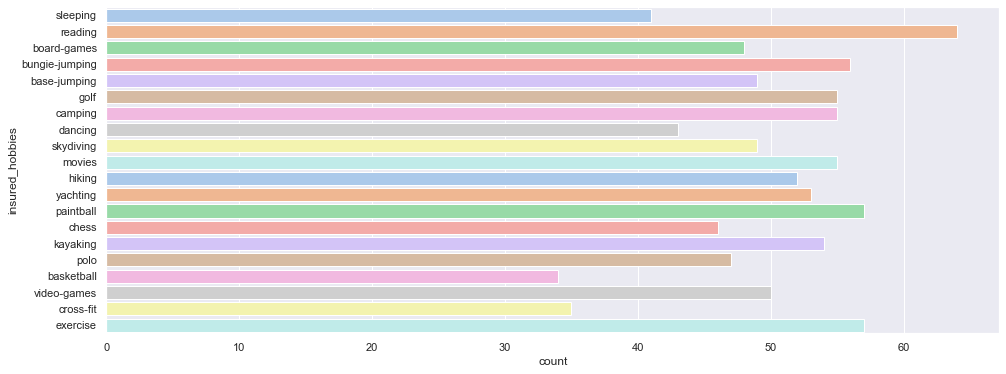

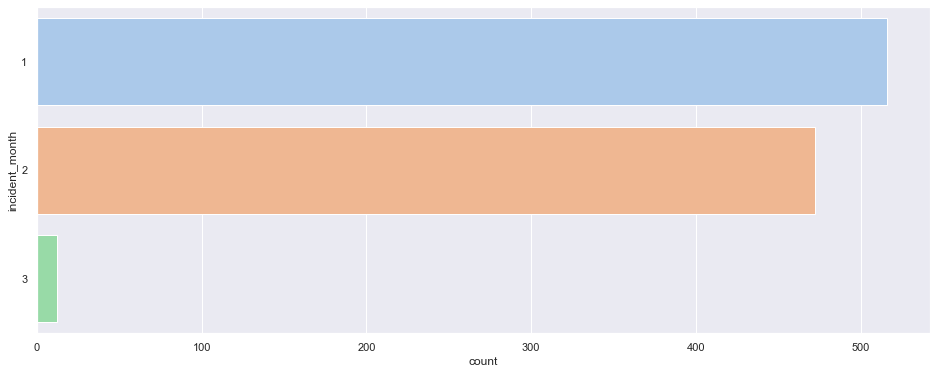

In [51]:
for i , name in enumerate(df[nom_var]):
    plt.figure(i,figsize=(16,6))
    sns.countplot(y=name ,data=df,palette='pastel')


Nominal variables' counts were visualized with bar plots. I sum up some observations in point:

Authorities_contacted: Police are the most frequently contacted followed by the fire brigades.
Auto_make: apart from Honda (least), most are relatively even.
Collision_type: the distribution looks evenly spread across the categories. Most are rear collisions. Smallest groups are the undocumented collisions. we can explore which collisions will be the most expensive and have the most frauds.
Incident_city: relatively even with Springfield and Arlington being the highest.
Incident_type: very few incidents are by theft/parked car. Most are by multivehicle collision and single vehicle collision. We can explore how claims and fraud differ across them.
Property_damage: relatively even but undocumented damage has the highest numbers

In [57]:
import warnings
warnings.filterwarnings('ignore')

TypeError: no numeric data to plot

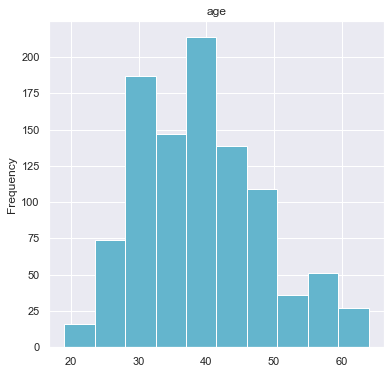

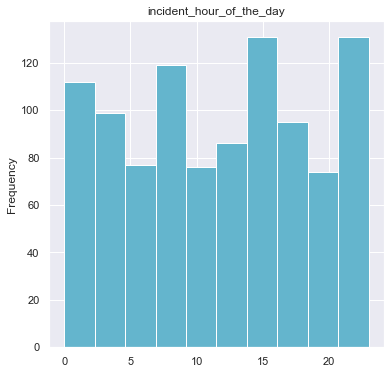

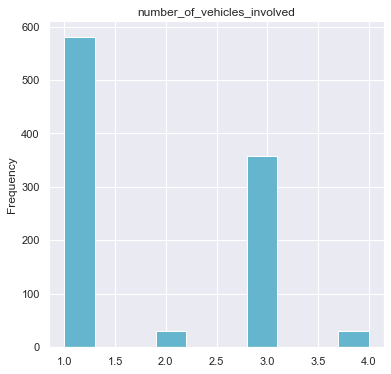

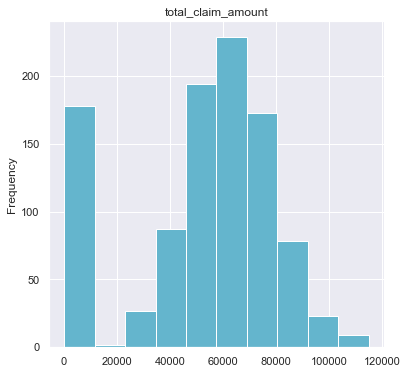

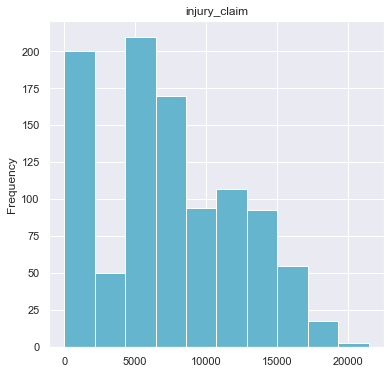

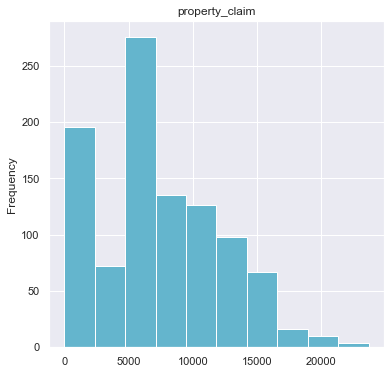

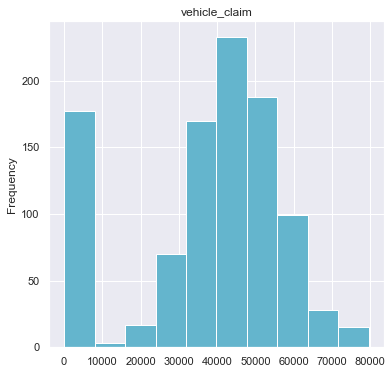

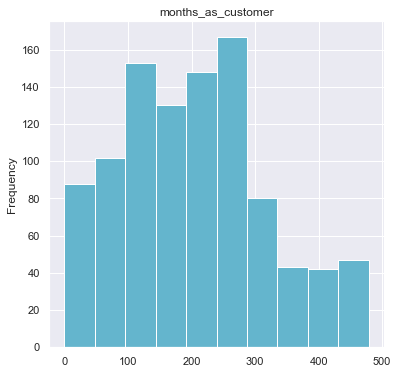

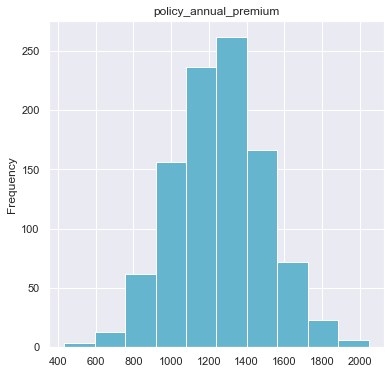

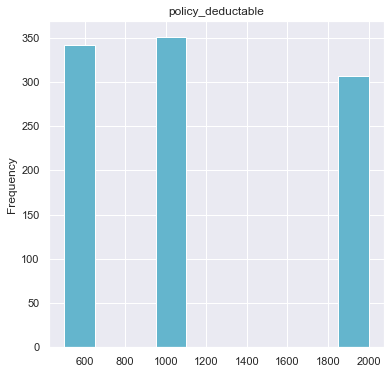

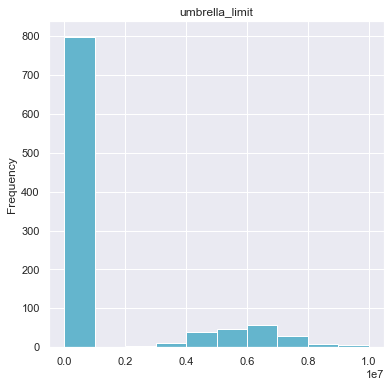

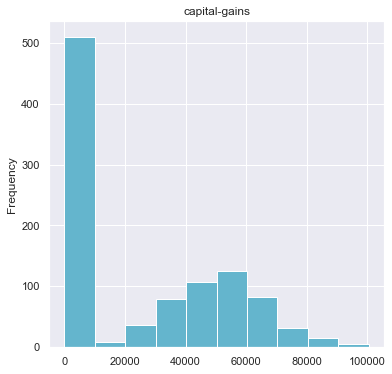

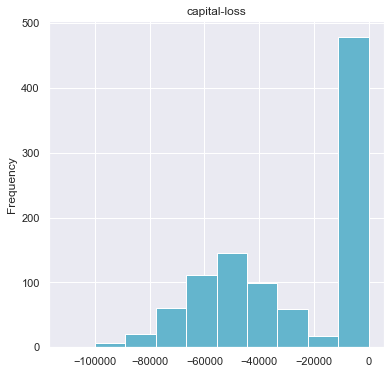

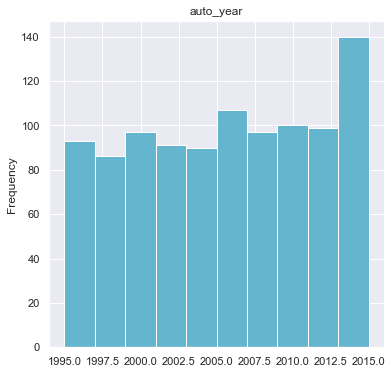

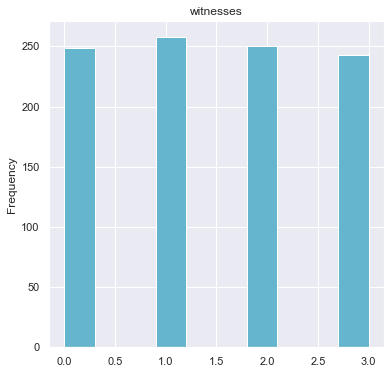

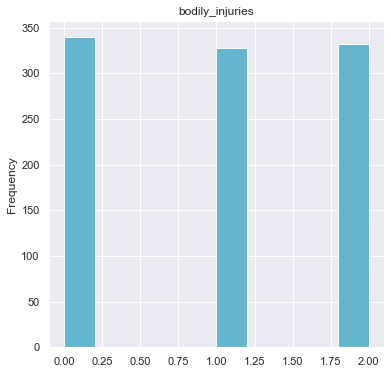

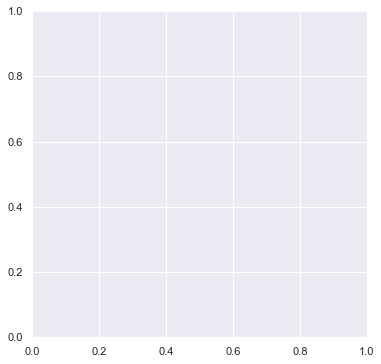

In [58]:
#distribution of ordinal and continuous variables

for i, name in enumerate(df[cont_var]):
    plt.figure(i,figsize=(6,6))
    df[name].plot(kind="hist", color="c", title=name)


Continuous variables' counts were visualized with bar plots. I sum up some observations in point:

policy annual premium: looks like a normal distribution.
policy bind years: have staggering frequencies with some range of years more popular than others. This may be some auto market cycle. 1990 to 2992 is the highest.
capital gain and loss: are mostly 0

# Visualizing variables against the DV¶
- Counts of every variable split by the DV was plotted. Below are a few notable plots.

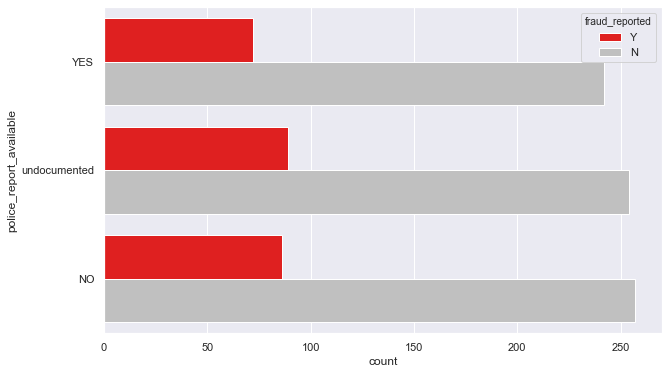

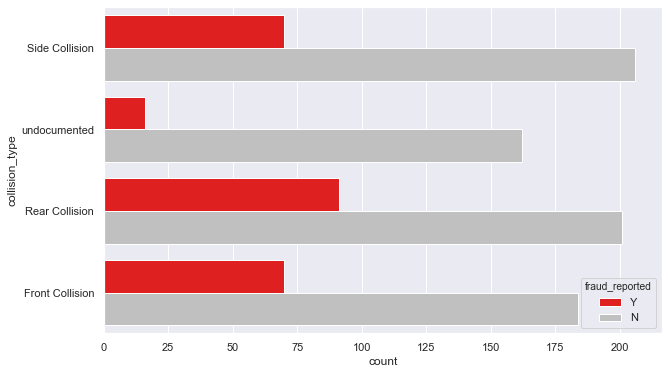

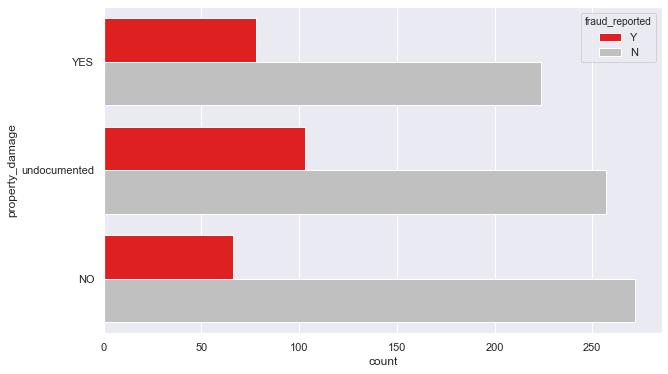

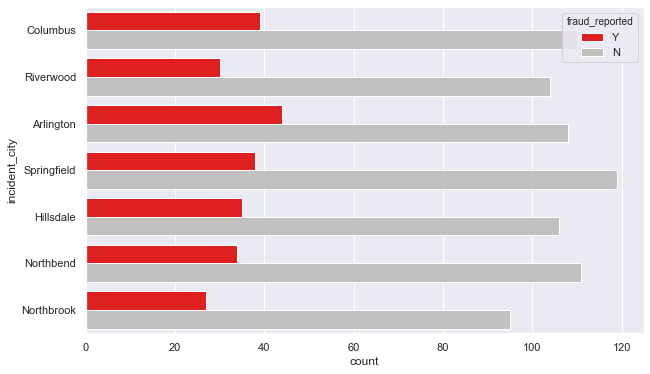

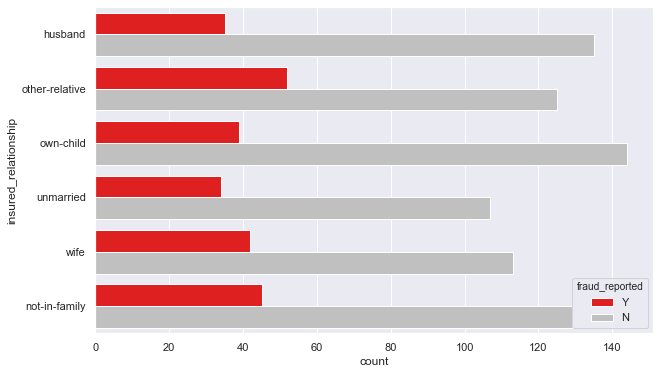

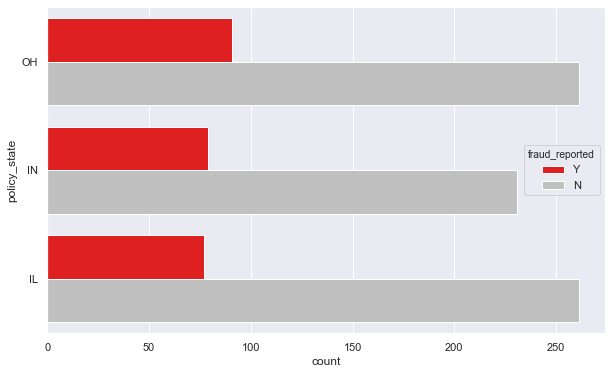

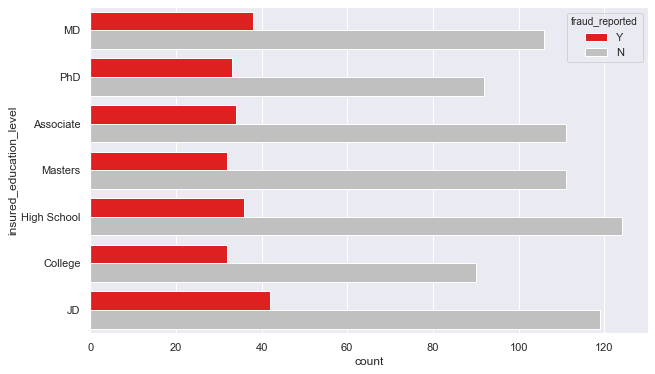

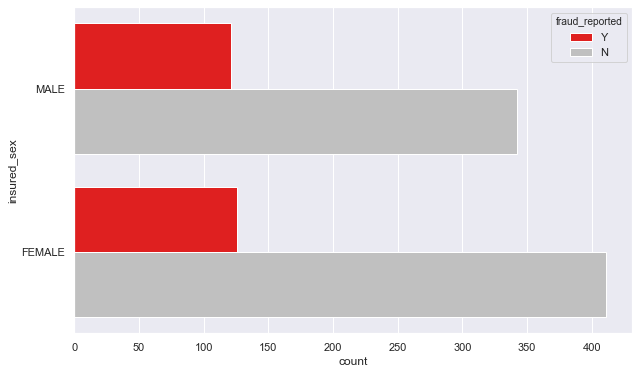

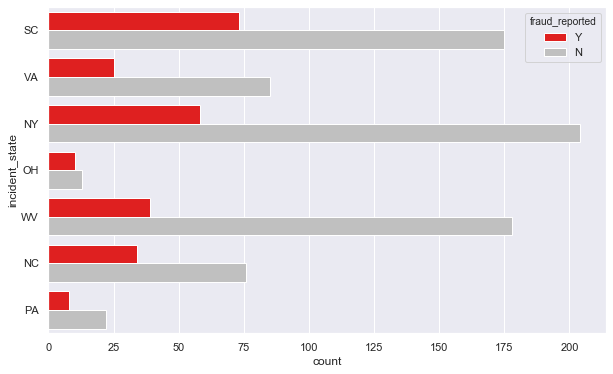

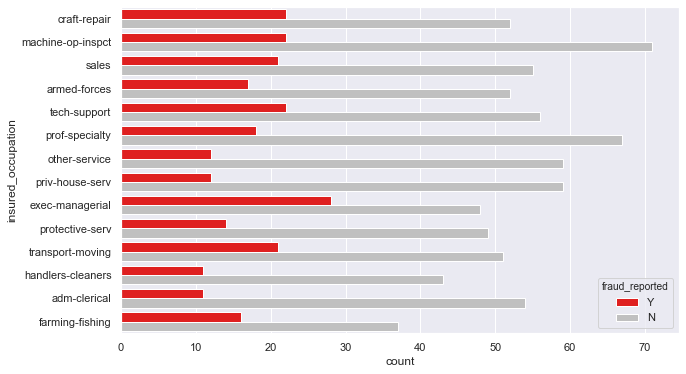

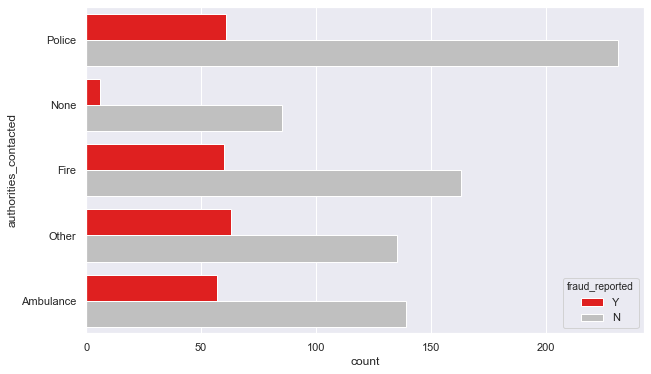

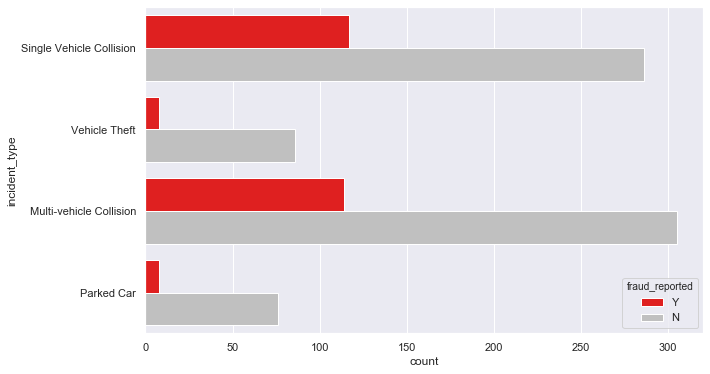

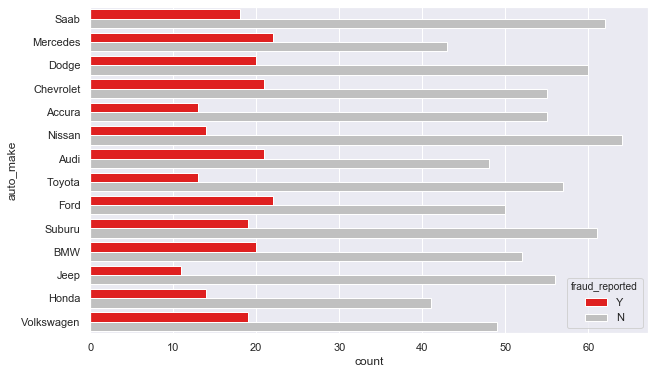

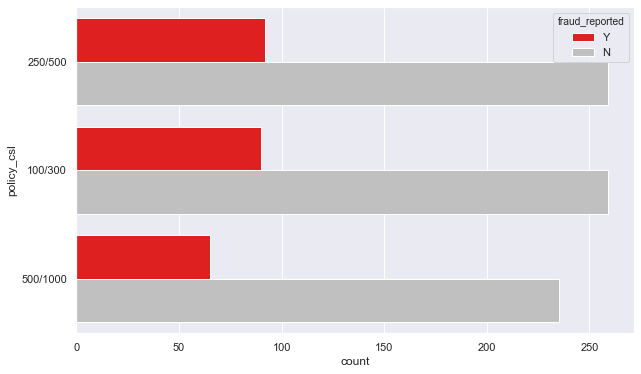

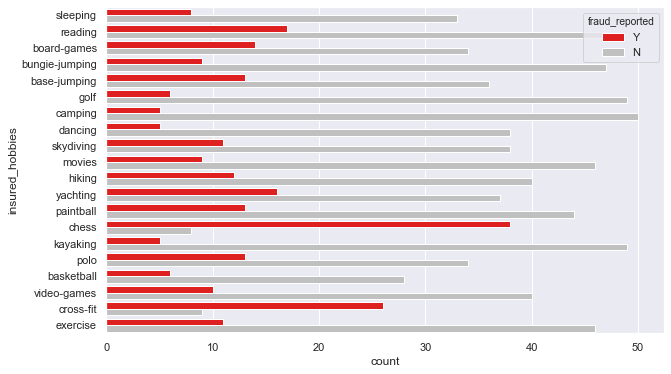

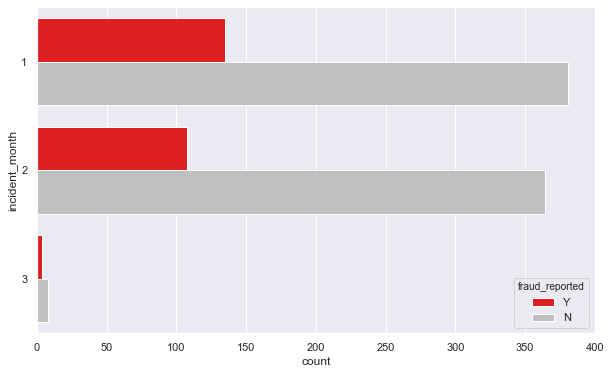

In [54]:

#each discrete var and fraud reported's dist

for i, name in enumerate(df[nom_var]):
    plt.figure(i,figsize=(10,6))
    sns.countplot(y=name, data=df, hue="fraud_reported", palette=['red','silver'])

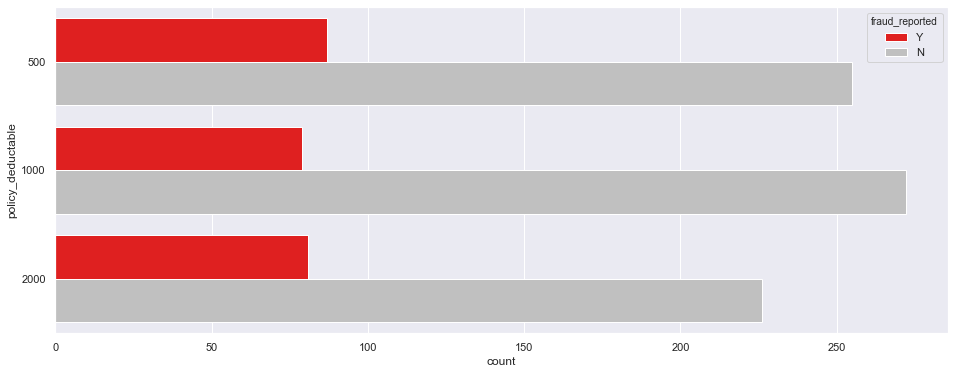

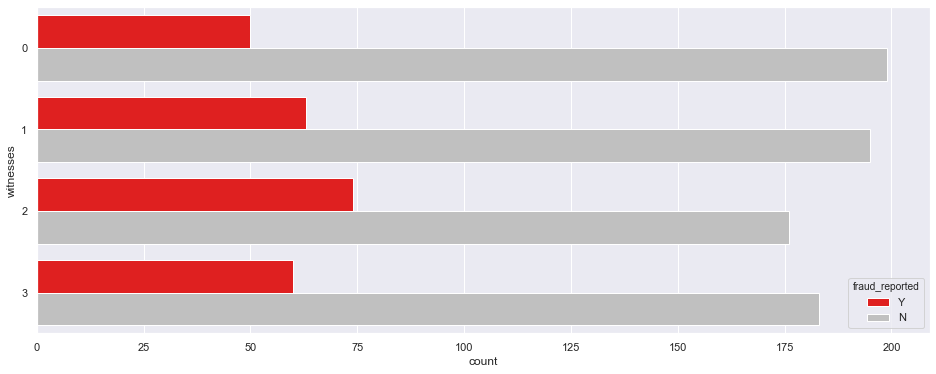

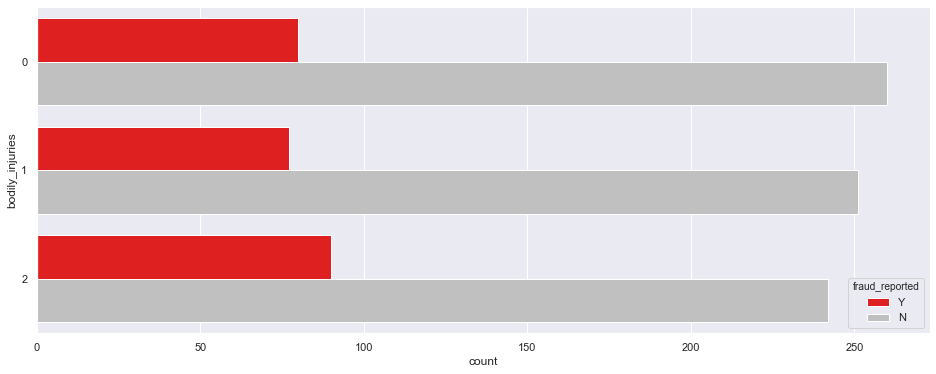

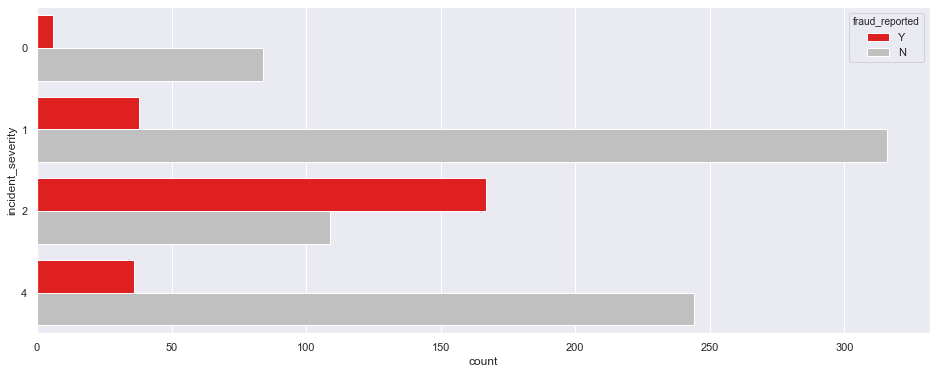

In [55]:
#each ordinal var and fraud reported's dist
#plt.style.use('dark_background')
#plt.style.use('default')


for i, name in enumerate(df[ord_var]):
    plt.figure(i,figsize=(16,6))
    sns.countplot(data=df, y=name, hue='fraud_reported', palette=['red','silver'])

TypeError: No loop matching the specified signature and casting
was found for ufunc add

<Figure size 1152x432 with 0 Axes>

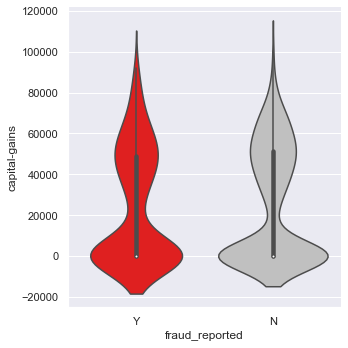

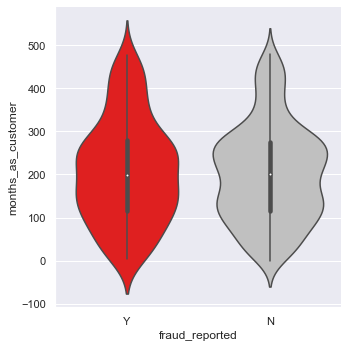

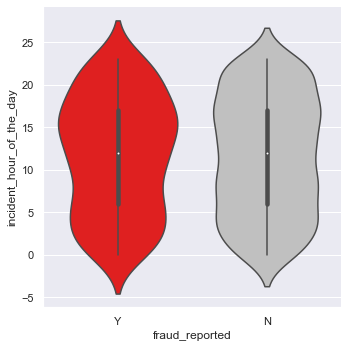

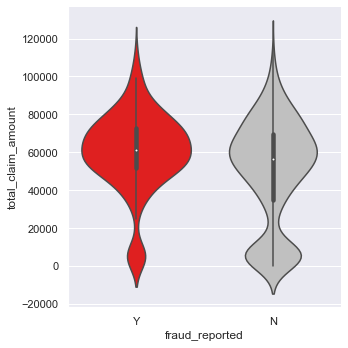

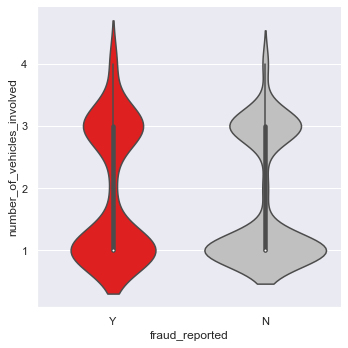

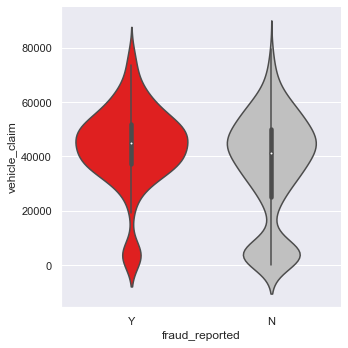

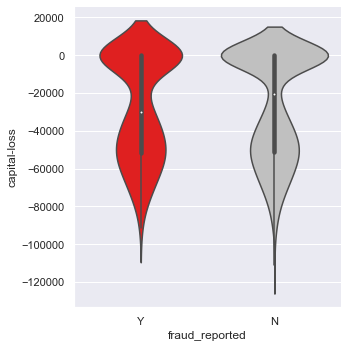

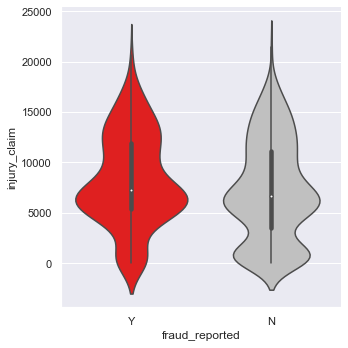

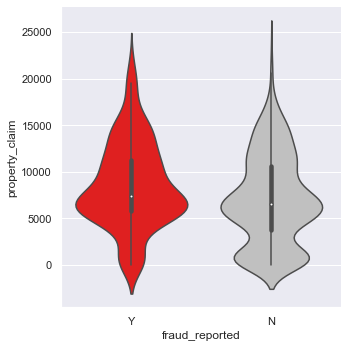

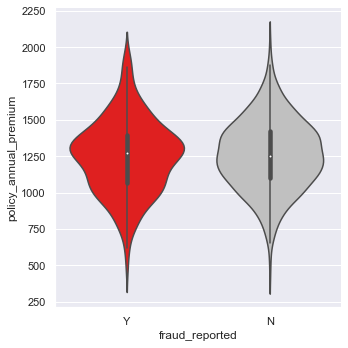

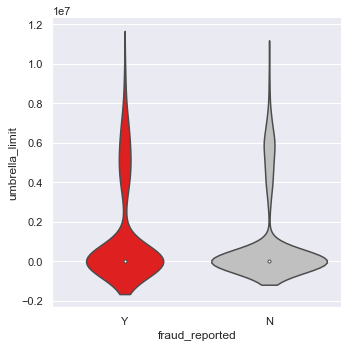

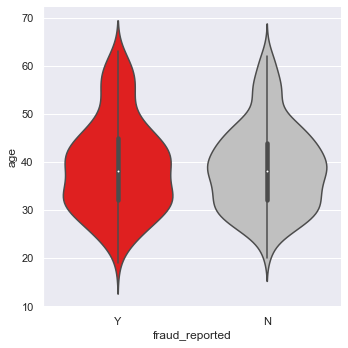

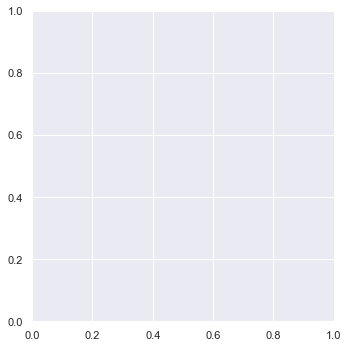

In [56]:
#each continous var and fraud reported's dist

for i, name in enumerate(df[quan_var]):
    plt.figure(i,figsize=(16,6))
    sns.catplot(data=df, x="fraud_reported", y=name, kind='violin', palette=['red','silver'])


Observations

Little have I suspected that fraud differed across hobbies. It seems like chess players and cross-fitters have higher tendencies of fraud. I stopped to think if the sports develop one to be inclined to fraud or that people with tendencies are drawn to it.



Major incident severity seems to have highest fraud cases that exceed non fraud cases.



There seem to be more frauds than non-fraud claims along the mean of total claims.

# Additional visualization and observations

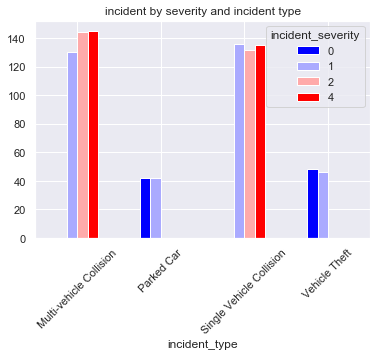

In [59]:
#cross tab of incident type and severity 
#more severe accidents seem to only be present with collision 

incident = pd.crosstab(df['incident_type'], df['incident_severity'])

incident.plot(kind='bar', colormap='bwr',figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and incident type");

- More severe accidents seem to only be present with collision.

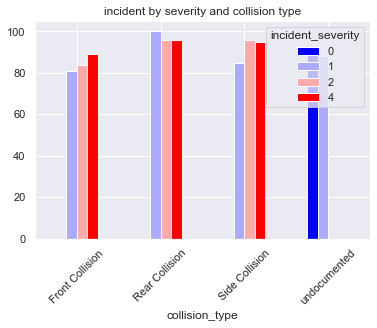

In [60]:

#undocumented collision types tend to be less severe

incident = pd.crosstab(df['collision_type'], df['incident_severity'])

incident.plot(kind='bar', colormap='bwr', figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and collision type");

- Undocumented collision types tend to be less severe. Perhaps the drivers see no need to document since accidents are not major.

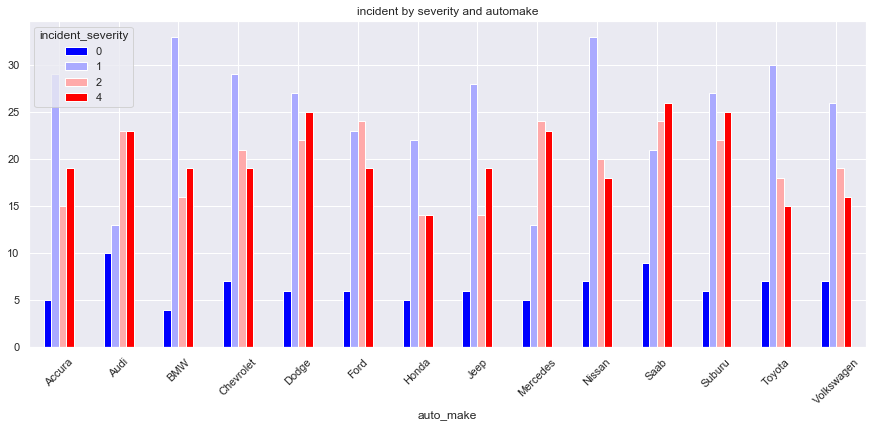

In [61]:
# seems like bmw and nissan gets a lot of minor accident
# fiercer cars like dodge, subaru, saab, merc get into mor severe accident

incident = pd.crosstab(df['auto_make'], df['incident_severity'])
incident.plot(kind='bar', colormap='bwr',figsize=(15,6))
plt.xticks(rotation=45)
plt.title("incident by severity and automake");

Seems like bmw and nissan gets a lot of minor accident Fiercer cars like dodge, subaru, saab, merc get into mor severe accident

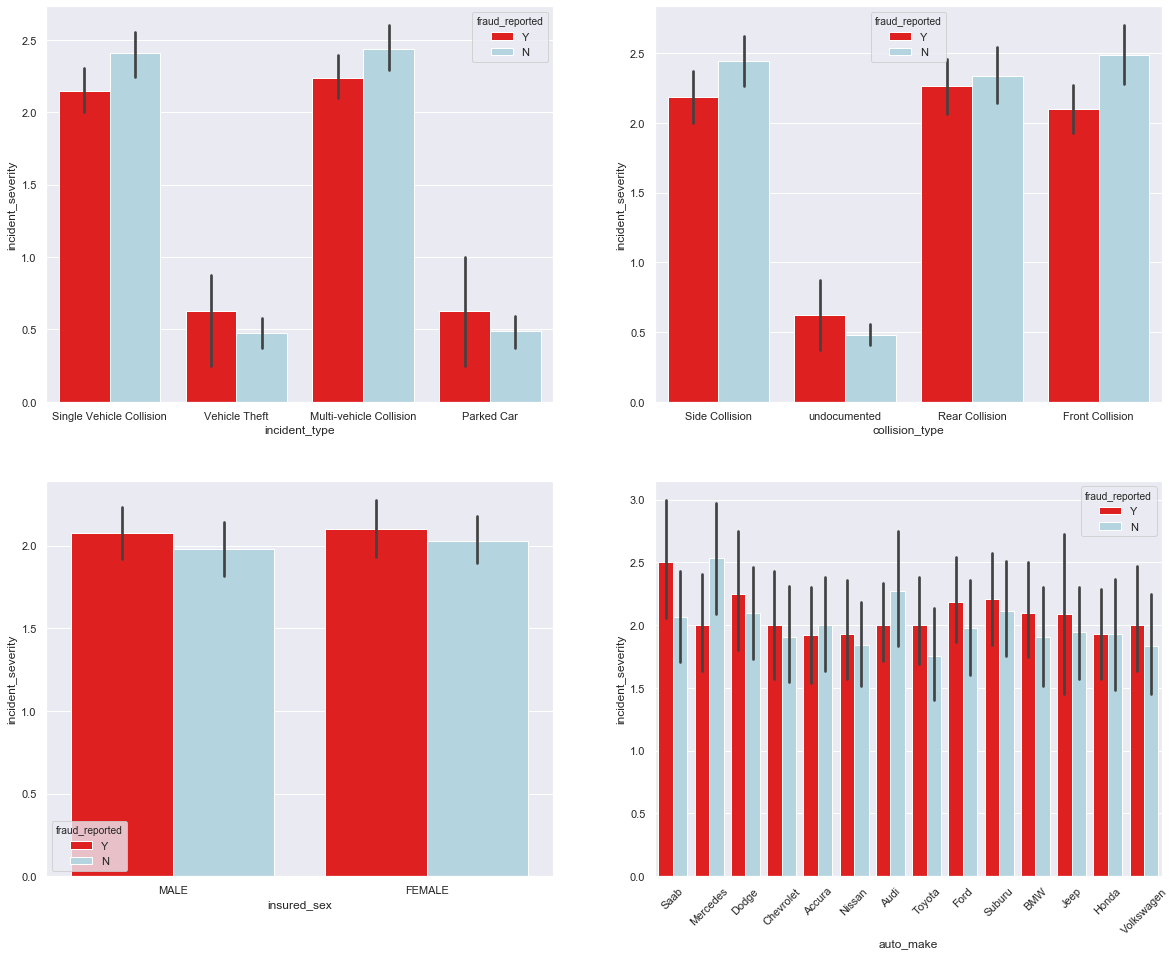

In [62]:

#severity and claims and fraud

fig, axes = plt.subplots(2,2, figsize=(20,16))

axes[0][0] = sns.barplot(x="incident_type", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[0][0]);

axes[0][1] = sns.barplot(x="collision_type", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[0][1]);

axes[1][0] = sns.barplot(x="insured_sex", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[1][0]);

axes[1][1] = sns.barplot(x="auto_make", y="incident_severity",
                hue="fraud_reported", 
                data=df, palette=['red','lightblue'], ax=axes[1][1]);

plt.xticks(rotation=45);

# although theft and parked car are less severe, they have more fraud cases.. maybe acrimony and vengeful?
# rear collision and undocumented have more fraud.. again we see a trend that less severe accidetns more fraud (undoc)
# no obvious trend by sex 
#saab subaru ford seem to have more fraud cases


Next, I looked at different types of claims and incident severity and frauds. Vehicle claims and property claims have more frauds than injury claims. Perhaps damage of vehicles and property causes more perceived unfairness. Trend of fraud is less obvious in total claims against incident severity as after summing and aggregating across different types of claims, the variances cancel out each other.

# Losses by claims
Here, I define loss as simply money going out from the insurance company. Source of money coming in, on the other hand, are premiums. Although we know premiums and claims are not the only source of money going in or out of an insurance company, these 2 variables are used since they are the only information, we have from this data set. Typically, other source of money movement maybe investments made by the insurance company, for instance.

In [65]:
# Preprocessing

The DV, fraud_reported was coded 1 for fraud and 0 for non-fraud.

Six interaction terms were created. Interaction between property claim amount and incident severity, vehicle claim amount and incident severity, injury claim amount and incident severity, total claim amount and incident severity, policy annual premium and total claim amount, umbrella limit and total claim amount.

Nominal variables were one-hot encoded, and the data set was split into 75% train and 25% test set, stratified on fraud reported.

In [66]:
#DV numerical code
df['fraud_reported'] = df['fraud_reported'].map({"Y":1, "N":0})
df['fraud_reported']

0      1
1      1
2      0
3      1
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     1
15     1
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     1
26     0
27     1
28     0
29     0
30     0
31     1
32     0
33     0
34     0
35     1
36     1
37     0
38     0
39     1
40     0
41     1
42     0
43     0
44     0
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     1
61     0
62     0
63     1
64     1
65     1
66     1
67     0
68     0
69     0
70     1
71     1
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     1
80     0
81     0
82     0
83     0
84     1
85     0
86     0
87     0
88     0
89     1
90     0
91     1
92     0
93     0
94     0
95     0
96     1
97     1
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    1
109    1
110    0
1

In [67]:
df['insured_sex'] = df['insured_sex'].map({"FEMALE":0,"MALE":1})

In [68]:

df['capital-loss']=df['capital-loss']*(-1)

In [69]:

df['capital-loss'].max()

111100

In [70]:
#check that they are coded

df['pclaim_severity_int'] = df['property_claim']*df['incident_severity']
df['vclaim_severity_int'] = df['vehicle_claim']*df['incident_severity']
df['iclaim_severity_int'] = df['injury_claim']*df['incident_severity']
df['tclaim_severity_int'] = df['total_claim_amount']*df['incident_severity']

df['prem_claim_int'] = df['policy_annual_premium']*df['total_claim_amount']
df['umlimit_tclaim_int'] = df['umbrella_limit']*df['total_claim_amount']

In [71]:
#Dummy coding

In [72]:

rem = ['insured_sex','incident_month']
dum_list = [e for e in nom_var if e not in rem]
len(dum_list)

14

In [73]:
dum = pd.get_dummies(df[dum_list], drop_first=True)
dum.head()

police_report_available_YES  police_report_available_undocumented  \
0                            1                                     0   
1                            0                                     1   
2                            0                                     0   
3                            0                                     0   
4                            0                                     0   

   collision_type_Rear Collision  collision_type_Side Collision  \
0                              0                              1   
1                              0                              0   
2                              1                              0   
3                              0                              0   
4                              0                              0   

   collision_type_undocumented  property_damage_YES  \
0                            0                    1   
1                            1                    0   
2                            0                    0   
3                            0                    0   
4                            1                    0   

   property_damage_undocumented  incident_city_Columbus  \
0                             0                       1   
1                             1                       0   
2                             0                       1   
3                             1                       0   
4                             0                       0   

   incident_city_Hillsdale  incident_city_Northbend  incident_city_Northbrook  \
0                        0                        0                         0   
1                        0                        0                         0   
2                        0                        0                         0   
3                        0                        0                         0   
4                        0                        0                         0   

   incident_city_Riverwood  incident_city_Springfield  \
0                        0                          0   
1                        1                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   insured_relationship_not-in-family  insured_relationship_other-relative  \
0                                   0                                    0   
1                                   0                                    1   
2                                   0                                    0   
3                                   0                                    0   
4                                   0                                    0   

   insured_relationship_own-child  insured_relationship_unmarried  \
0                               0                               0   
1                               0                               0   
2                               1                               0   
3                               0                               1   
4                               0                               1   

   insured_relationship_wife  policy_state_IN  policy_state_OH  \
0                          0                0                1   
1                          0                1                0   
2                          0                0                1   
3                          0                0                0   
4                          0                0                0   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    

In [74]:
dum.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df_dummied = pd.concat([dum, df], axis=1)

In [75]:
df_dummied.drop(nom_var, axis=1, inplace=True)

In [76]:
df_dummied.head()

police_report_available_YES  police_report_available_undocumented  \
0                            1                                     0   
1                            0                                     1   
2                            0                                     0   
3                            0                                     0   
4                            0                                     0   

   collision_type_Rear Collision  collision_type_Side Collision  \
0                              0                              1   
1                              0                              0   
2                              1                              0   
3                              0                              0   
4                              0                              0   

   collision_type_undocumented  property_damage_YES  \
0                            0                    1   
1                            1                    0   
2                            0                    0   
3                            0                    0   
4                            1                    0   

   property_damage_undocumented  incident_city_Columbus  \
0                             0                       1   
1                             1                       0   
2                             0                       1   
3                             1                       0   
4                             0                       0   

   incident_city_Hillsdale  incident_city_Northbend  incident_city_Northbrook  \
0                        0                        0                         0   
1                        0                        0                         0   
2                        0                        0                         0   
3                        0                        0                         0   
4                        0                        0                         0   

   incident_city_Riverwood  incident_city_Springfield  \
0                        0                          0   
1                        1                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   insured_relationship_not-in-family  insured_relationship_other-relative  \
0                                   0                                    0   
1                                   0                                    1   
2                                   0                                    0   
3                                   0                                    0   
4                                   0                                    0   

   insured_relationship_own-child  insured_relationship_unmarried  \
0                               0                               0   
1                               0                               0   
2                               1                               0   
3                               0                               1   
4                               0                               1   

   insured_relationship_wife  policy_state_IN  policy_state_OH  \
0                          0                0                1   
1                          0                1                0   
2                          0                0                1   
3                          0                0                0   
4                          0                0                0   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    

In [77]:
df_dummied.isnull().sum().any()

False

In [78]:
df_dummied['umbrella_limit'].sort_values(ascending=True)

0             0
622           0
623           0
624           0
625           0
627           0
628           0
629           0
630           0
632           0
633           0
634           0
621           0
635           0
637           0
638           0
640           0
641           0
642           0
643           0
645           0
646           0
647           0
648           0
649           0
636           0
650           0
620           0
617           0
588           0
589           0
590           0
591           0
592           0
593           0
594           0
595           0
596           0
600           0
601           0
618           0
602           0
605           0
606           0
608           0
609           0
610           0
611           0
612           0
613           0
614           0
615           0
616           0
604           0
587           0
651           0
655           0
698           0
699           0
701           0
702           0
703           0
704     

In [79]:
dd = df_dummied.describe()
dd.loc['min']

police_report_available_YES                    0.00
police_report_available_undocumented           0.00
collision_type_Rear Collision                  0.00
collision_type_Side Collision                  0.00
collision_type_undocumented                    0.00
property_damage_YES                            0.00
property_damage_undocumented                   0.00
incident_city_Columbus                         0.00
incident_city_Hillsdale                        0.00
incident_city_Northbend                        0.00
incident_city_Northbrook                       0.00
incident_city_Riverwood                        0.00
incident_city_Springfield                      0.00
insured_relationship_not-in-family             0.00
insured_relationship_other-relative            0.00
insured_relationship_own-child                 0.00
insured_relationship_unmarried                 0.00
insured_relationship_wife                      0.00
policy_state_IN                                0.00
policy_state

In [84]:
from scipy.stats import pointbiserialr, stats
from imblearn.over_sampling import SMOTE, ADASYN 

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

from xgboost import XGBClassifier
from xgboost import plot_importance



from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [85]:
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

# Baseline accuracy score
As our dataset is imbalance, accuracy is not a good measure of success. A high accuracy can be achieved by a poor model that only selects the majority class, hence, not detecting and measuring the accuracy of classifying the class of interest. In fact, predicting only the majority class will give an accuracy of 75%, specificity of 100% but a sensitivity of 0%.

If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have a score as shown below:

Sensitivity: 1.0
Specificity: 0.0
Precision: 0.248
F1 score: 0.397
ROC AUC Score: 0.50
As identifying as many frauds as possible is the goal, the F1 score of 0.397 was used as a baseline. However, investigations into frauds can be time consuming and expensive and may even affect customer experience. Thus, ROC AUC score will also be used to measure how well we distinguish between Fraud and legit claims. The baseline ROC AUC score is 0.50. I am to have a ROC AUC of at least 0.70.

In [87]:
#baseline accuracy = 75.2%

y_test.value_counts(normalize=True)

0    0.752
1    0.248
Name: fraud_reported, dtype: float64

In [88]:

y_test.value_counts()

0    188
1     62
Name: fraud_reported, dtype: int64

In [89]:
base_recall = 62/(62)
base_speci = 0/(188)
base_preci = 62/(250)
base_f1 = 2*base_recall*base_preci/(base_recall+base_preci)


df_prob = pd.DataFrame()
df_prob['y']=y_test
df_prob['pred']=1
auc_score = roc_auc_score(df_prob['y'], df_prob['pred'])


print("If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have an:")
print("")
print("Sensitivity:", base_recall)
print('Specificity:', base_speci)
print('Precision:', base_preci)
print('F1 score:', base_f1)
print('ROC AUC Score:', auc_score)

If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have an:

Sensitivity: 1.0
Specificity: 0.0
Precision: 0.248
F1 score: 0.3974358974358974
ROC AUC Score: 0.5


# Modeling
Five different classifiers were used in this project:

logistic regression
K-nearest neighbours
Random forest
XGBoost
AdaBoost
Hyperparameter tuning and selection was done for all the models using RandomizedSearch. Due to the number of parameters and models that were ran, RandomizedSearch is a faster more efficient choice as compared to gridsearch.



After a 10-fold RandomizedSearchCV, the model with its selected hyperparameters were fitted on the training set.

Mean accuracy scores for the best estimators of the RandomizedSearchCV, accuracy scores on the training set and accuracy scores on the test set was computed. Then, the sensitivity, specificity, precision, F1 score and ROC AUC scores were computed.



In [98]:
#function to use for scoring 

def scores(t, name):
    print (name, 'classification metric')
    print("CV scores:", round(t.best_score_,3))
    print("train score:", round(t.score(x_train, y_train),3))
    print("test score:", round(t.score(x_test, y_test),3))

    #Evaluation metrics
    predictions = t.predict(x_test)

    TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

    sensi = TP/(TP + FN)
    speci= TN/(TN + FP)
    preci = TP/(TP + FP)
    f1= 2*(preci*sensi)/(preci+sensi)

    print(f'Sensitivity: {round(sensi,3)}')
    print(f'Specificity: {round(speci,3)}')
    print(f'Precision: {round(preci,3)}')
    print(f'F1: {round(f1,3)}')

    pred_proba = [i[1] for i in t.predict_proba(x_test)]
    auc_score = roc_auc_score(y_test, pred_proba)
    print('ROC AUC Score:', round(auc_score,3))

#  Logistic regression

In [99]:
y_train.value_counts(normalize=True)

0    0.753333
1    0.246667
Name: fraud_reported, dtype: float64

In [100]:
#ransearch log reg

lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            'class_weight':[{0:0.246667, 1:0.75333},None]}

    
rs_lr = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr.fit(x_train, y_train, )
print(rs_lr.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None, 'C': 5963.623316594637}


# KNN

In [101]:

# knn = KNeighborsClassifier()
# ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':[3,5,7,9,11],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn = RandomizedSearchCV(knn_pipe, knn_values, cv=10, n_jobs = -1, random_state=42)
rs_knn.fit(x_train, y_train)
print(rs_knn.best_params_)

{'knn__weights': 'distance', 'knn__n_neighbors': 7, 'knn__metric': 'euclidean', 'knn__leaf_size': 7, 'knn__algorithm': 'brute'}


In [102]:
# Random forest

In [103]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'class_weight':[{0:0.246667, 1:0.75333},None]
              }


    
rs_rf = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf.fit(x_train, y_train)
print(rs_rf.best_params_)

{'n_estimators': 350, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'class_weight': {0: 0.246667, 1: 0.75333}}


0    565
1    185
Name: fraud_reported, dtype: int64

In [ ]:
# AdaBoost

In [109]:

ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab.fit(x_train, y_train)
print(rs_rf.best_params_)

{'n_estimators': 350, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'class_weight': {0: 0.246667, 1: 0.75333}}


In [110]:
# Evaluate

In [114]:
classifiers={'logreg':rs_lr, 'knn':rs_knn, 'Ranfor':rs_rf, 
              'AdaBoost':rs_ab}

for key, value in classifiers.items(): 
    print(scores(value,key))
    print("__________________________")
    print(" ")

logreg classification metric
CV scores: 0.761
train score: 0.847
test score: 0.704
Sensitivity: 0.339
Specificity: 0.824
Precision: 0.389
F1: 0.362
ROC AUC Score: 0.656
None
__________________________
 
knn classification metric
CV scores: 0.771
train score: 1.0
test score: 0.732
Sensitivity: 0.177
Specificity: 0.915
Precision: 0.407
F1: 0.247
ROC AUC Score: 0.67
None
__________________________
 
Ranfor classification metric
CV scores: 0.801
train score: 0.975
test score: 0.8
Sensitivity: 0.581
Specificity: 0.872
Precision: 0.6
F1: 0.59
ROC AUC Score: 0.836
None
__________________________
 
AdaBoost classification metric
CV scores: 0.817
train score: 0.905
test score: 0.78
Sensitivity: 0.419
Specificity: 0.899
Precision: 0.578
F1: 0.486
ROC AUC Score: 0.844
None
__________________________
 
